In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import json
import PyQt5
from matplotlib.font_manager import FontManager
from matplotlib.font_manager import *
import subprocess
import pickle as pkl

myfont = FontProperties(fname='/usr/share/fonts/simhei.ttf')
matplotlib.rcParams['axes.unicode_minus']=False



BASE_DIR = '/home/latte/work_space/performance_analysis1'
DOC_DIR = os.path.join(BASE_DIR, 'doc')
TIME_4_5_DIR = os.path.join(DOC_DIR, 'time_travl4_5')
JPG_RS_DIR = os.path.join(DOC_DIR, 'jpg_rs')

file_6 = os.path.join(TIME_4_5_DIR, '6hop_31_36/result.json')
file_5 = os.path.join(TIME_4_5_DIR, '5hop_32_35/result.json')
file_4 = os.path.join(TIME_4_5_DIR, '4hop_37_35/result.json')
file_3 = os.path.join(TIME_4_5_DIR, '3hop_48_35/result.json')
file_2 = os.path.join(TIME_4_5_DIR, '2hop_83_47/result.json')
file_1 = os.path.join(TIME_4_5_DIR, '1hop_100_90/result.json')
file_4_5_list = [file_1, file_2, file_3, file_4, file_5, file_6]

jpgrs_file_6 = os.path.join(JPG_RS_DIR, '6hop/result.json')
jpgrs_file_5 = os.path.join(JPG_RS_DIR, '5hop/result.json')
jpgrs_file_4 = os.path.join(JPG_RS_DIR, '4hop/result.json')
jpgrs_file_3 = os.path.join(JPG_RS_DIR, '3hop/result.json')
jpgrs_file_2 = os.path.join(JPG_RS_DIR, '2hop/result.json')
jpgrs_file_1 = os.path.join(JPG_RS_DIR, '1hop/result.json')
file_jpg_rs_list = [jpgrs_file_1, jpgrs_file_2, jpgrs_file_3, jpgrs_file_4, jpgrs_file_5, jpgrs_file_6]

dict_list = [json.load(open(ii, 'r')) for ii in file_4_5_list]
jpgrs_dict_list = [json.load(open(ii, 'r')) for ii in file_jpg_rs_list]
print(dict_list[0]['MAC']['Delay'])
print(jpgrs_dict_list[0]['MAC']['Delay'])
hops = [ii + 1 for ii in range(0,6)]
packet_size = 84
ack_size = 8
ber = 0.0001
per = 1 - (1 - ber)**(packet_size * 8)
p2p_delay = 1.91
print(jpgrs_dict_list[-1])

def hour2sec(str_time):
    hour, mins, sec = [int(ii) for ii in str_time.split(":")]
    return hour * 3600 + mins * 60 + sec

1.97
1.05
{'Overall': {'duration': '00:04:31', 'start_time': '2019-05-19 20:18:55', 'end_time': '2019-05-19 20:23:26'}, 'MAC': {'total_deli_rate': 40.67796610169491, 'send_data_num': 629, 'recv_data_num': 256, 'Delay': 1.74, 'Throughput': -0.0, 'recv_num': 360, 'drop_rate': 59.3, 'send_num': 885, 'deli_rate': 40.7, 'deli_rate_without_broadcast': 40.68}, 'Route': {'deli_rate_clean': 38.095238095238095, 'Delay': 31.75, 'Throughput': -0.0, 'recv_num': 24, 'drop_rate': 61.9, 'send_num': 63, 'deli_rate': 38.1}}


## 吞吐量

[19.62025847953193, 18.331179186386077, 17.126804040892765, 16.001566559693522, 14.950266114803028, 13.968043884922158]
[21.024990083300278, 17.406593406593405, 10.054945054945055, 7.807058823529411, 6.666145426114151, 6.501954652071931]
[20.671875, 16.567474048442907, 10.76923076923077, 9.06474820143885, 7.557093425605537, 7.439114391143911]


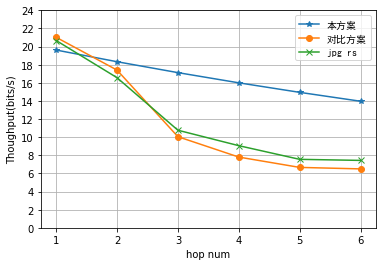

In [23]:
## Thoughput 
## bad
def get_thoughput(json_):
    net_recv_num = json_['Route']['recv_num']
#     deli_rate = json_['Route']['deli_rate'] / 100.0
    duration = hour2sec(json_['Overall']['duration'])
    return net_recv_num * packet_size / duration
def cau_thoughput(hops):
    data_size = 631 * packet_size * (1 - per)**hops 
    data_delay = 631 * 4 + p2p_delay * hops
    
    return data_size / data_delay

# print([ii['Route']['recv_num'] for ii in dict_list])
# print([hour2sec(ii['Overall']['duration']) for ii in dict_list])
# print([ii['Overall']['duration'] for ii in dict_list])
    
thoughput = [cau_thoughput(ii) for ii in hops]
thoughput1 = [get_thoughput(ii) for ii in dict_list]
thoughput2 = [get_thoughput(ii) for ii in jpgrs_dict_list]
print(thoughput)
print(thoughput1)
print(thoughput2)

plt.plot(hops, thoughput, marker='*')
plt.plot(hops, thoughput1, marker='o')
plt.plot(hops, thoughput2, marker='x')
plt.xlabel('hop num')
plt.ylabel('Thoughput(bits/s)')
plt.yticks(np.arange(0, 25, 2))
plt.legend((u'本方案', u'对比方案', u'jpg rs'),loc='best',prop=myfont) # sets our legend for our graph.
# plt.legend()
plt.grid()
# plt.title(u'中文',fontproperties=myfont)
plt.savefig(os.path.join(TIME_4_5_DIR, 'Thoughput.pdf'))
plt.show()

## 端到端时延

[4.2780518098185345, 6.760200516817225, 9.566760431286882, 12.73083924686179, 16.288579912886803, 20.279422635539614]
[2.98, 18.846344696969698, 45.24580327868853, 64.72409282700421, 92.50522167487685, 100.73691919191918]
[2.32, 10.533157894736842, 27.881999999999998, 52.437, 69.97846153846153, 83.34375]


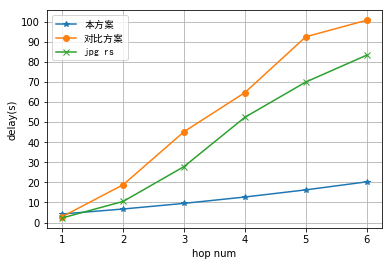

In [24]:
## delay good
def get_delay(json_):
    packet_delay = json_['Route']['Delay']
    deli_rate_clean = json_['Route']['deli_rate_clean'] / 100.0    
    return packet_delay / deli_rate_clean


delay = [(4 + p2p_delay * (ii - 1))  /  (1 - per)**ii for ii in hops]
delay1 = [get_delay(ii) for ii in dict_list]
delay2 = [get_delay(ii) for ii in jpgrs_dict_list]

print(delay)
print(delay1)
print(delay2)

plt.plot(hops, delay, marker='*', label="aa")
plt.plot(hops, delay1, marker='o', label="bb")
plt.plot(hops, delay2, marker='x', label="bb")
plt.xlabel('hop num')
plt.ylabel('delay(s)')
plt.legend((u'本方案', u'对比方案', 'jpg rs'),loc='best',prop=myfont) # sets our legend for our graph.
plt.yticks(range(0, 110, 10))
plt.grid()
plt.savefig(os.path.join(TIME_4_5_DIR, 'Delay.pdf'))
plt.show()

## 交付率

[0.9350050391675062, 0.8742344232686299, 0.8174135911698674, 0.7642858268278339, 0.7146110994483287, 0.6681649790292192]
[1.0, 0.8368000000000001, 0.48340000000000005, 0.37560000000000004, 0.32170000000000004, 0.31379999999999997]
[1.0, 0.9048, 0.5556, 0.47619999999999996, 0.4127, 0.381]


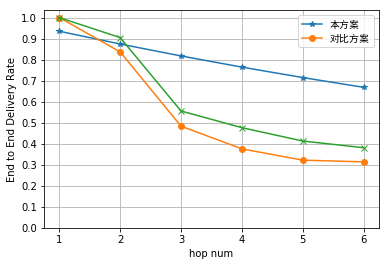

In [25]:
##  deli_rate 
## bad
def get_deli_rate(json_):
    net_deli_rate = json_['Route']['deli_rate'] / 100.0
    mac_deli_rate = json_['MAC']['deli_rate'] / 100.0
    return net_deli_rate, mac_deli_rate


deli_rate = [(1 - per) ** ii for ii in hops]
deli_rate1 = [get_deli_rate(ii)[0] for ii in dict_list]
deli_rate2 = [get_deli_rate(ii)[0] for ii in jpgrs_dict_list]
print(deli_rate)
print(deli_rate1)
print(deli_rate2)
deli = dict({
    "0":deli_rate,
    "1":deli_rate1    
})

pkl.dump(deli, open('./simulation/deil.pkl', 'wb'), protocol=2)

# print([ii * 631 / 8 for ii in deli_rate])

plt.plot(hops, deli_rate, marker='*')
plt.plot(hops, deli_rate1, marker='o')
plt.plot(hops, deli_rate2, marker='x')

plt.xlabel('hop num')
plt.ylabel('End to End Delivery Rate')
plt.yticks(np.arange(0, 1.1, 0.1))

plt.legend((u'本方案', u'对比方案'),loc='best',prop=myfont) # sets our legend for our graph.
plt.grid()
plt.savefig(os.path.join(TIME_4_5_DIR, 'Deli_rate .pdf'))
plt.show()

## 数据包效率

[0.8184741775679494, 0.7587044540848744, 0.7029352348130835, 0.6509112011945719, 0.6023936149279795, 0.5571592138541795]
[0.7241775057383321, 0.25141716928937463, 0.13934212243832397, 0.09837329274800861, 0.07959446591609254, 0.073843858776728]
[0.7209809264305177, 0.30257836198179977, 0.16111354669004824, 0.11448300926767217, 0.08769675554127851, 0.0759722640940609]


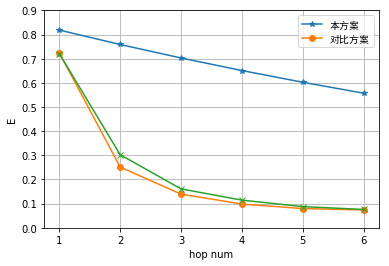

In [26]:
## 数据包效率

def get_packet_effect(json_):
    mac_send_ack_num = json_['MAC']['send_num'] - json_['MAC']['send_data_num']
    mac_send_data_num = json_['MAC']['send_data_num']
        
    net_recv_data = json_['Route']['recv_num']
    return  float(net_recv_data * packet_size) / (mac_send_ack_num * packet_size + mac_send_data_num * ack_size) 


packet_effec = [((1 - per) ** ii) * 631 / (631 + packet_size / (1 - per)**ii) for ii in hops]
packet_effec1 = [get_packet_effect(ii) for ii in dict_list]
packet_effec2 = [get_packet_effect(ii) for ii in jpgrs_dict_list]

print(packet_effec)
print(packet_effec1)
print(packet_effec2)


plt.plot(hops, packet_effec, marker='*')
plt.plot(hops, packet_effec1, marker='o')
plt.plot(hops, packet_effec2, marker='x')

plt.xlabel('hop num')
plt.ylabel('E')
# plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend((u'本方案', u'对比方案'),loc='best',prop=myfont) # sets our legend for our graph.
plt.yticks(np.arange(0, 1, 0.1))
plt.grid()
plt.savefig(os.path.join(TIME_4_5_DIR, 'Packet_effect .pdf'))
plt.show()


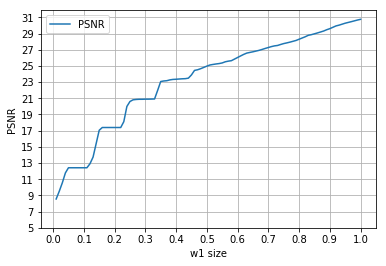

In [27]:
df_w1 = pd.read_csv('./simulation/process/whale_128/res.csv')
df_w1 = df_w1[df_w1['psnr'] != 0]

size = df_w1['size']
psnr = df_w1['psnr']

plt.plot(list(size), list(psnr), label='PSNR')
plt.legend()
plt.xlabel('w1 size')
plt.ylabel('PSNR')
plt.yticks(range(5, 33, 2))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.savefig('./simulation/sim_w1/w1_psnr.pdf')
plt.show()

[1, 2, 3, 4, 5, 6]
[inf, 15.667246971219635, 10.628475510015717, 9.792546619196337, 9.403244395748043, 9.358452731688413]


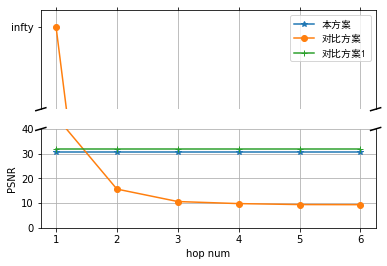

In [4]:
df = pd.read_csv('./simulation/sim_ack_per/res_df.csv')

PSNR0 = [30.750517] * 6
PSNR1 = list(df['PSNR'])
PSNR2 = [31.8604989187] * 6

print(hops)
print( PSNR1)

f, (ax0, ax1) = plt.subplots(2, 1, sharex=True)

INF = 45
PSNR1[0] = INF


ax0.plot(hops, PSNR0, marker="*")
ax1.plot(hops, PSNR0,  marker="*")
ax0.plot(hops, PSNR1, marker="o")
ax1.plot(hops, PSNR1,  marker="o")
ax0.plot(hops, PSNR2, marker="+")
ax1.plot(hops, PSNR2,  marker="+")



ax0.set_ylim(40, 46)
ax1.set_ylim(0, 40)

ax0.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax0.xaxis.tick_top()
ax0.tick_params(labeltop='off')  # don't put tick labels at the top
ax1.xaxis.tick_bottom()
# ax1.grid()
ax0.set_yticks([INF])
ax0.set_yticklabels(['infty'])
ax0.xaxis.grid()

plt.grid()

d = 0.015
kwargs = dict(transform=ax0.transAxes, color='k', clip_on=False)
ax0.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax0.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
ax1.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
ax0.legend((u'本方案', u'对比方案', u'对比方案1'),loc='best',prop=myfont) # sets our legend for our graph.
plt.ylabel('PSNR')
plt.xticks(hops)
plt.xlabel('hop num')
plt.savefig('./simulation/compare.pdf')


    Unnamed: 0   w1   p1  w1_done  all_done
48          48  0.7  0.1  119.508   120.953
49          49  0.7  0.2  119.737   121.807
50          50  0.7  0.3  118.053   122.657
51          51  0.7  0.4  116.676   130.392
52          52  0.7  0.5  114.244   149.988
53          53  0.7  0.6  109.599   186.496
54          54  0.7  0.7  105.112   237.767
55          55  0.7  0.8   97.469   341.101


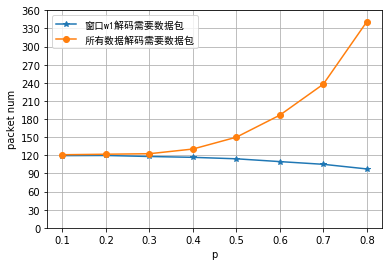

In [11]:
df = pd.read_csv('./simulation/sim_diff_psnr/combind_p1_w1.csv')
df = df.iloc[48:56, :]
# print(df['w1'] == 0.7)
print(df)
w1_done = list(df['w1_done'])
all_done = list(df['all_done'])
p1 = list(df['p1'])

plt.plot(p1, w1_done, marker='*')
plt.plot(p1, all_done, marker='o')
plt.yticks(range(0, 370, 30))
plt.grid()
plt.xlabel('p')
plt.ylabel('packet num')
plt.legend((u'窗口w1解码需要数据包', u'所有数据解码需要数据包'),loc='best',prop=myfont)

plt.savefig('./simulation/p1_diff_needNum.pdf')